### Using Matplotlib and geopandas, we're looking to plot the SF streets network

In [1]:
%%capture
!pip install osmnx

In [2]:
# cell 1

import geopandas as gpd
import pandas as pd
import numpy as np
import matplotlib.cm as cm
import networkx as nx
import osmnx
osmnx.config(log_file=True, log_console=True, use_cache=True)

### Open city of SF

In [3]:
city2 = osmnx.gdf_from_place('San Francisco, San Francisco, California, USA')
city2.head()

,geometry,place_name,bbox_north,bbox_south,bbox_east,bbox_west
0,"MULTIPOLYGON (((-123.17382 37.77573, -123.1737...","San Francisco, California, United States of Am...",37.929811,37.640314,-122.281479,-123.173825


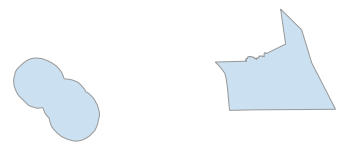

In [4]:
fig, sf = osmnx.plot_shape(osmnx.project_gdf(city2))
fig.show()

### Need to figure out  how to avoid those weird  islands

In [7]:
# create the street network within the city of SF's borders

#G2 = osmnx.graph_from_place('San Francisco, California, USA')
#G2_projected = osmnx.project_graph(G2)

#fig, ax = osmnx.plot_graph(G2_projected)
#fig.show()

#It's too big to run!

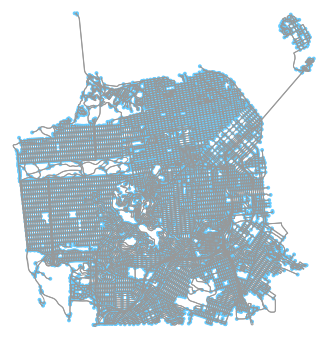

In [6]:
# What if I put it in a boundary?
north, south, east, west = 37.833370, 37.704459, -122.340099, -122.553989

# create network from that bounding box
SF = osmnx.graph_from_bbox(north, south, east, west, network_type='drive')
SF_projected = osmnx.project_graph(SF)

fig, ax = osmnx.plot_graph(SF_projected)
fig.show()
#seems to work!